Задача 1

Считать данные, получить графики для пяти примеров начиная с N=(P%17)+1, где P - ваш номер в списке, научиться по осциллограмме получать значения давления

К примеру, для P=2 нужны файлы:

15.log

20.log

5.log

7.log

17.log

In [11]:
import pandas as pd
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
#import ml_metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

Мой номер в списке - 32. Значит, N.примера - 16.

Мне нужны следующие файлы:

11.log

14.log

15.log

19.log

20.log

In [32]:
files = ["11.log", "14.log", "15.log", "19.log", "20.log"] # Загружаем файлы

In [33]:
def read_log_file(file_path): # Функция для чтения файла
    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Пропускаем первую строку с заголовком
        lines = lines[1:]
        # Разбиваем каждую строку на значения времени и давления
        data = [tuple(map(int, line.split()[:2])) for line in lines if len(line.split()[:2]) == 2]
    return data

In [34]:
data = {file: read_log_file(file) for file in files}

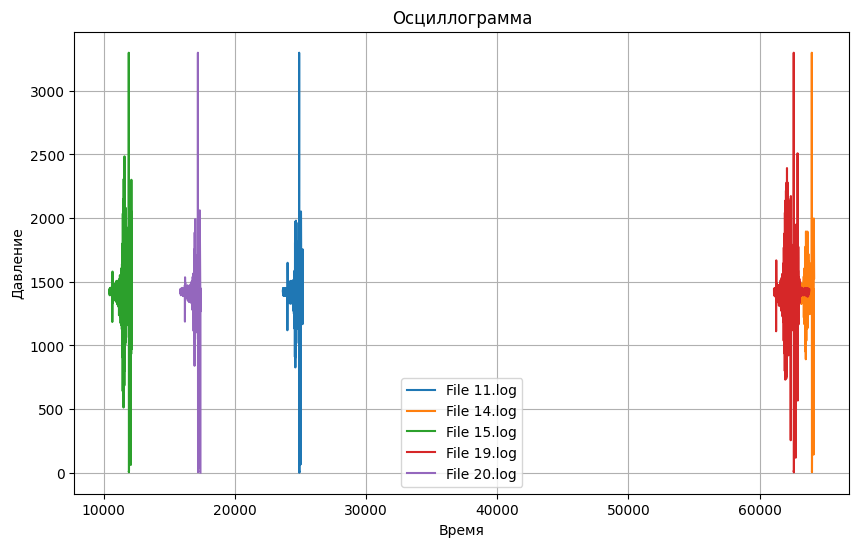

In [35]:
# Графики
plt.figure(figsize=(10, 6))
for file, data in data.items():
    time, pressure = zip(*data)
    plt.plot(time, pressure, label=f"File {file}")

plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('Осциллограмма')
plt.legend()
plt.grid(True)
plt.show()

Задача 2

для номера примера N=(P%17)+1, где P - ваш номер в группе. Провести более подробные исследования осциллограмма и построить графики:

  **Произвести сглаживание**

1. Скользящим средним (окно определите самостоятельно)
2. Экспоненциальное сглаживание

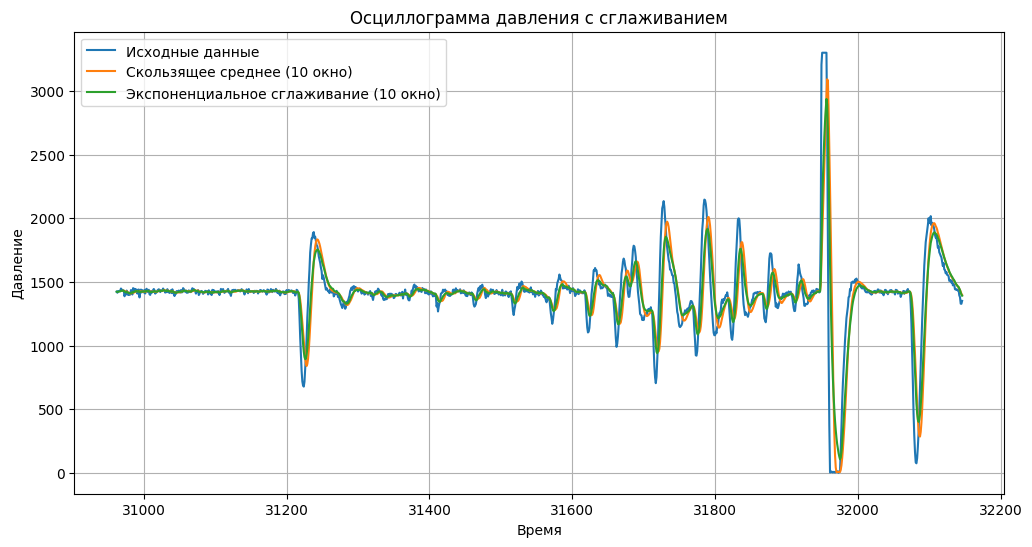

In [37]:
file_path = "6.log"
with open(file_path, 'r') as file:
    lines = file.readlines()

lines = lines[1:]
data = [tuple(map(int, line.split()[:2])) for line in lines if len(line.split()[:2]) == 2]
df = pd.DataFrame(data, columns=['Время', 'Давление'])

# Применяем скользящее среднее и экспоненциальное сглаживание
rol_window = 10  # Размер окна
smoothed_rol = df['Давление'].rolling(window=rol_window).mean()
smoothed_exp = df['Давление'].ewm(span=rol_window, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Время'], df['Давление'], label='Исходные данные')
plt.plot(df['Время'], smoothed_rol, label=f'Скользящее среднее ({rol_window} окно)')
plt.plot(df['Время'], smoothed_exp, label=f'Экспоненциальное сглаживание ({rol_window} окно)')
plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('Осциллограмма давления с сглаживанием')
plt.legend()
plt.grid(True)
plt.show()

Задача 3

Произвести разложение в ряд Фурье и выделить наиболее значимые гармоники и построить обратное преобразование и отрисовать два графика: первоначальную осциллограмму и восстановленную по нескольким значимых гармоникам и построить графики.

In [38]:
time, pressure = zip(*data)

In [39]:
# преобразование Фурье
n = len(pressure)
dt = 1  # предполагаем, что временной интервал равен 1
frequency = np.fft.fftfreq(n, d=dt)
transformed = np.fft.fft(pressure)

In [43]:
# Находим наиболее значимые гармоники
top_n = 6  # Количество наиболее значимых гармоник
indices = np.argsort(np.abs(transformed))[-top_n:]
sign_freq = frequency[indices]

In [41]:
# Восстанавливаем осциллограмму из наиболее значимых гармоник
rec_transform = np.zeros_like(transformed)
rec_transform[indices] = transformed[indices]
rec_pressure = np.fft.ifft(rec_transform)

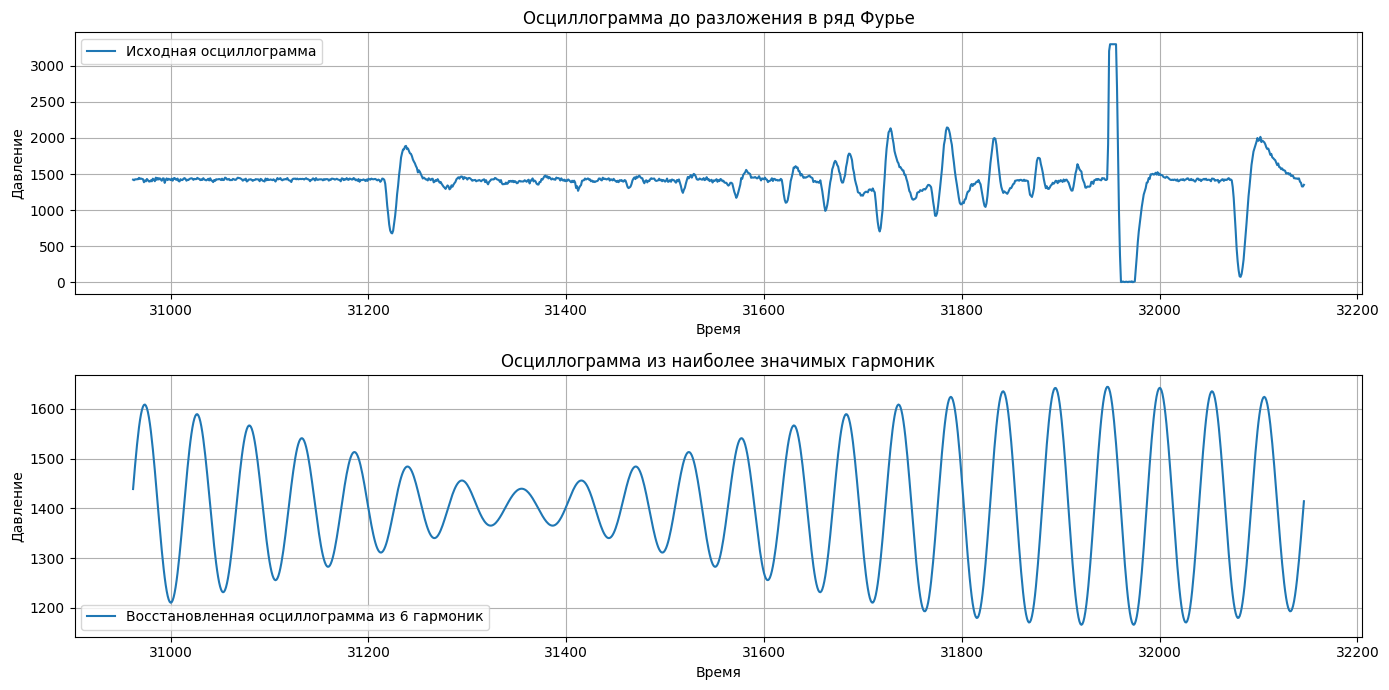

In [44]:
plt.figure(figsize=(14, 7))
# Оригинальная осциллограмма
plt.subplot(2, 1, 1)
plt.plot(time, pressure, label='Исходная осциллограмма')
plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('Осциллограмма до разложения в ряд Фурье')
plt.legend()
plt.grid(True)

# Восстановленная осциллограмма
plt.subplot(2, 1, 2)
plt.plot(time, np.real(rec_pressure), label=f'Восстановленная осциллограмма из {top_n} гармоник')
plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('Осциллограмма из наиболее значимых гармоник')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Задача 4

Определите наличие тренда и периодичности в данных.

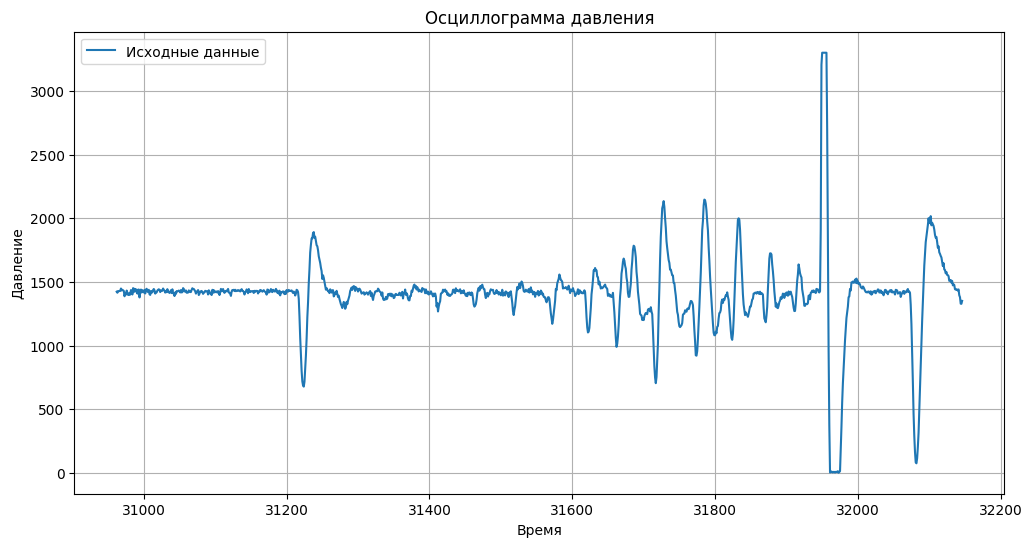

In [45]:
# Построение графика временного ряда
plt.figure(figsize=(12, 6))
plt.plot(time, pressure, label='Исходные данные')
plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('Осциллограмма давления')
plt.legend()
plt.grid(True)
plt.show()

Тренд - это общий характер движения данных во времени. Если есть стабильное увеличение или уменьшение, а также визуально можно увидеть рост или упадок давления со временем, то это может указывать на наличие тренда.

В моём графике выше тренд есть.

Периодичность - это повторяющиеся паттерны в данных. Если есть повторяющиеся циклы или волны, это может указывать на наличие периодичности. На графике видно наличие повторяющихся пиков и спадов, что может указывать на периодичность.

В моём графике выше также присутствует периодичность.

Задача 5

Выполните задания с 1 по 3 для временного ряда, который будет получен из комбинации (для начала можно выбрать линейный вариант) осциллограммы и показателей нагнетаемого давления (физически, полученная осциллограмма зависит от нагнетаемого давления) Позволит такое преобразование получить лучшие результаты?

In [46]:
# Генерация синтетических данных для нагнетаемого давления
np.random.seed(0)  # Для воспроизводимости
num_points = 1000
synt_pressure = np.linspace(50, 100, num_points) + np.random.normal(0, 5, num_points)

In [47]:
# Функция для чтения данных
def read_log_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = lines[1:]
        data = [tuple(map(int, line.split()[:2])) for line in lines if len(line.split()[:2]) == 2]
    return data

# Считывание данных осциллограммы
oscill_files = ["11.log", "14.log", "15.log", "19.log", "20.log"]
oscill_data = {file: read_log_file(file) for file in oscill_files}

In [48]:
oscill_sample = oscill_data["11.log"]

In [49]:
# Создание линейной комбинации и показателей нагнетаемого давления
combined_data = []
for (time, osc_pressure), synt_pressure_value in zip(oscill_sample, synt_pressure):
    combined_pressure = osc_pressure + synt_pressure_value  # Линейная комбинация
    combined_data.append((time, combined_pressure))

# Преобразование в DataFrame
df_combined = pd.DataFrame(combined_data, columns=['Time', 'Pressure'])

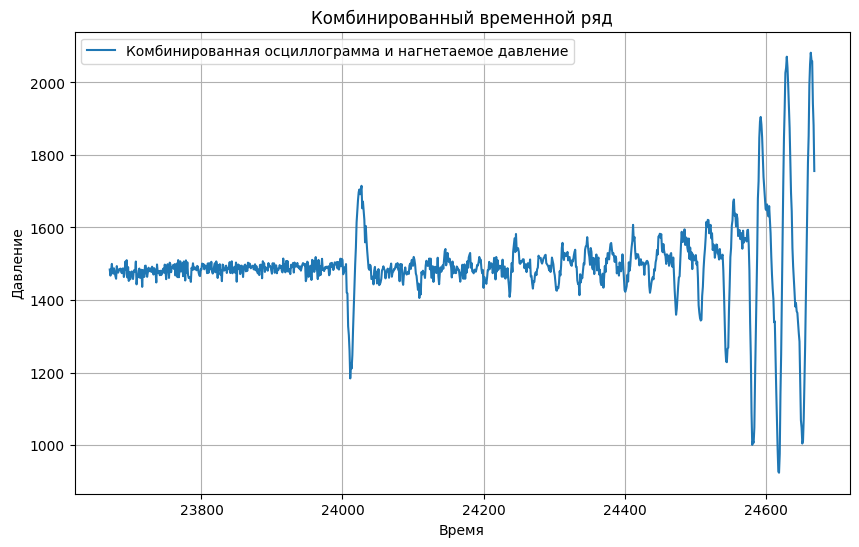

In [50]:
# Построение графика комбинированного временного ряда
plt.figure(figsize=(10, 6))
plt.plot(df_combined['Time'], df_combined['Pressure'], label='Комбинированная осциллограмма и нагнетаемое давление')
plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('Комбинированный временной ряд')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Применяем скользящее среднее и экспоненциальное сглаживание
rol_window = 10  # Размер окна
smoothed_rol = df['Давление'].rolling(window=rol_window).mean()
smoothed_exp = df['Давление'].ewm(span=rol_window, adjust=False).mean()

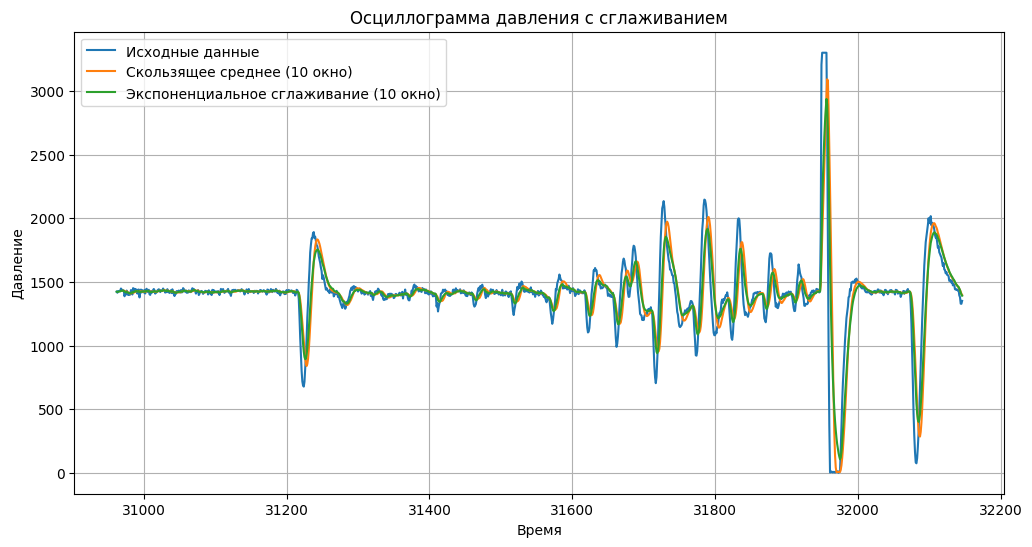

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df['Время'], df['Давление'], label='Исходные данные')
plt.plot(df['Время'], smoothed_rol, label=f'Скользящее среднее ({rol_window} окно)')
plt.plot(df['Время'], smoothed_exp, label=f'Экспоненциальное сглаживание ({rol_window} окно)')
plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('Осциллограмма давления с сглаживанием')
plt.legend()
plt.grid(True)
plt.show()

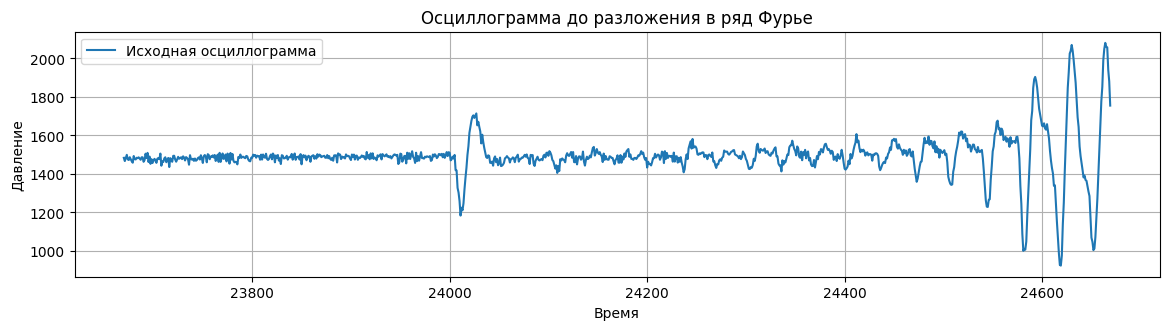

In [54]:
time, pressure = zip(*combined_data)
n = len(pressure)
dt = 1  # Предполагаем, что временной интервал равен 1
frequency = np.fft.fftfreq(n, d=dt)
transformed = np.fft.fft(pressure)

# Находим наиболее значимые гармоники
top_n = 6  # Количество наиболее значимых гармоник
indices = np.argsort(np.abs(transformed))[-top_n:]
sign_freq = frequency[indices]

# Восстанавливаем осциллограмму из наиболее значимых гармоник
rec_transform = np.zeros_like(transformed)
rec_transform[indices] = transformed[indices]
rec_pressure = np.fft.ifft(rec_transform)

plt.figure(figsize=(14, 7))

# Оригинальная осциллограмма
plt.subplot(2, 1, 1)
plt.plot(time, pressure, label='Исходная осциллограмма')
plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('Осциллограмма до разложения в ряд Фурье')
plt.legend()
plt.grid(True)

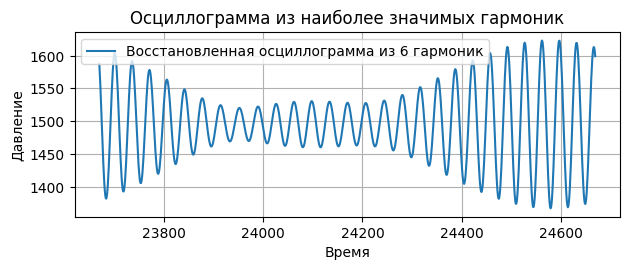

In [55]:
# Восстановленная осциллограмма
plt.subplot(2, 1, 2)
plt.plot(time, np.real(rec_pressure), label=f'Восстановленная осциллограмма из {top_n} гармоник')
plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('Осциллограмма из наиболее значимых гармоник')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Комбинирование данных осциллограммы и нагнетаемого давления может улучшить результаты анализа в некоторых случаях, так как это позволяет учитывать влияние давления на осциллограмму.

Создание комбинированного временного ряда позволяет учитывать влияние обоих параметров на анализируемый процесс. Это может дать полное представление о динамике и улучшить точность дальнейшего анализа.

Скользящее среднее помогает сгладить временной ряд, уменьшая влияние случайных колебаний. Это полезно для выделения основной тенденции в данных.

Экспоненциальное сглаживание также снижает влияние случайных колебаний, придавая больший вес более недавним значениям. Это может быть полезно для выявления более текущих трендов.

Разложение в ряд Фурье позволяет выделить частотные компоненты сигнала и выявить наиболее значимые гармоники. Это помогает анализировать периодичность и основные частотные характеристики сигнала.